## Import Library & Data

In [1]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from mpstemmer import MPStemmer
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import requests
import csv
from io import StringIO
from wordcloud import WordCloud

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.cuda.amp import autocast, GradScaler
from torch.nn.functional import softmax
import random

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, BertForSequenceClassification, BertConfig, BertTokenizer, AutoModelForSequenceClassification

import os

2025-11-25 10:52:22.145325: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 10:52:24.116152: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/itsgoy21/main/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/itsgoy21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/itsgoy21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/itsgoy21/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:

os.chdir("/mnt/d/Data/My Skill/Analyze Review App Netflix")
print(os.getcwd()) 

/mnt/d/Data/My Skill/Analyze Review App Netflix


In [4]:
scrapreview, _ = reviews(
    'com.spotify.music',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=30000
)

In [5]:
df = pd.DataFrame(scrapreview)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c6c4b3ec-f535-4903-a46e-0057999226aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Besttt!,5,0,9.0.96.826,2025-11-24 10:30:00,None,NaT,9.0.96.826
1,86e57860-385a-4350-aba0-4957c58227c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang 3 aja,, aplikasinya sering keluar sendiri",3,0,9.0.96.826,2025-11-24 10:25:04,"Hai, apakah Anda sudah mencoba menginstal ulan...",2025-11-24 18:56:35,9.0.96.826
2,31d6b27c-0098-4b4c-afad-723eb7e6a1a3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sekarang bikin g nyaman apa apa harus premium ...,1,0,None,2025-11-24 10:17:34,None,NaT,None
3,5e1ffb67-77d1-40ac-9f0c-8e7c881e86e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap lah...👍,5,0,9.0.94.274,2025-11-24 10:01:31,None,NaT,9.0.94.274
4,9cd31613-4685-4ae4-9601-770fb8389379,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mau download lagu aja susah,tapi katanya aplik...",1,0,9.0.96.826,2025-11-24 09:54:51,None,NaT,9.0.96.826


In [6]:
df.to_csv("Review App Spotify.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              30000 non-null  object        
 1   userName              30000 non-null  object        
 2   userImage             30000 non-null  object        
 3   content               30000 non-null  object        
 4   score                 30000 non-null  int64         
 5   thumbsUpCount         30000 non-null  int64         
 6   reviewCreatedVersion  22304 non-null  object        
 7   at                    30000 non-null  datetime64[ns]
 8   replyContent          2368 non-null   object        
 9   repliedAt             2368 non-null   datetime64[ns]
 10  appVersion            22304 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.5+ MB


In [8]:
clean_df = df.drop(columns=['reviewId', 'userImage', 'replyContent', 'repliedAt'])
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22304 entries, 0 to 29998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              22304 non-null  object        
 1   content               22304 non-null  object        
 2   score                 22304 non-null  int64         
 3   thumbsUpCount         22304 non-null  int64         
 4   reviewCreatedVersion  22304 non-null  object        
 5   at                    22304 non-null  datetime64[ns]
 6   appVersion            22304 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


## Data Preprocessing

In [9]:
url = "https://raw.githubusercontent.com/ezaaputra/Sentiment-Analysis-Using-BERT/refs/heads/main/kamus_alay.csv"
slangwords = pd.read_csv(url)
slangwords.head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [10]:
def casefoldingtext(text):
    text = text.lower()
    return text

def cleaningtext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(\w+)²', r'\1', text)
    text = re.sub(r'\b(\w+)\1\b', r'\1', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = " ".join([w for w in text.split() if len(w) > 1])
    text = emoji.demojize(text)
    text = re.sub(':[A-Za-z_-]+:', ' ', text)
    text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)
    text = text.replace('\n', '')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

normalize_word_dict = {}
for index, row in slangwords.iterrows():
    if row[0] not in normalize_word_dict:
        normalize_word_dict[row[0]] = row[1]

def fix_slangwords(text):
    list_text = word_tokenize(text)
    list_text = [normalize_word_dict[term] if term in normalize_word_dict else term for term in list_text]
    text = " ".join(list_text)
    return text

def tokenizingtext(text):
    text = word_tokenize(text)
    return text

stemmer = MPStemmer()
cache ={}
def stemmingtext(words):
    stemmed_words = []
    for word in words:
        if word in cache:
            stemmed_words.append(cache[word])
        else:
            stem = stemmer.stem(word)
            cache[word] = stem
            stemmed_words.append(stem)
    return stemmed_words

def filteringtext(text):
    factory = StopWordRemoverFactory()
    listStopwords = set(factory.get_stop_words())
    listStopwords1 = set(stopwords.words('indonesian'))
    listStopwords2 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(listStopwords2)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = [txt for txt in text if txt not in listStopwords]
    text = filtered
    return text

def tosentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

/tmp/ipykernel_881/2189585805.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalize_word_dict:
/tmp/ipykernel_881/2189585805.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalize_word_dict[row[0]] = row[1]


In [11]:
teks = "  auuuu mau      memberi makan gaga tidak berguna      "
tokens = word_tokenize(teks)
print(cleaningtext(teks))
print(stemmingtext(tokens))
print(filteringtext(tokens))  

au mau memberi makan ga tidak berguna
['auuuu', 'mau', 'beri', 'makan', 'gaga', 'tidak', 'guna']
['auuuu', 'makan', 'gaga', 'berguna']


In [12]:
clean_df['text_casefoldingText'] = clean_df['content'].apply(casefoldingtext)
clean_df['text_clean'] = clean_df['text_casefoldingText'].apply(cleaningtext)
clean_df['text_slangwords'] = clean_df['text_clean'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingtext)
clean_df['text_stemming'] = clean_df['text_tokenizingText'].apply(stemmingtext)
clean_df['text_stopwords'] = clean_df['text_stemming'].apply(filteringtext)
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(tosentence)

In [13]:
clean_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_casefoldingText,text_clean,text_slangwords,text_tokenizingText,text_stemming,text_stopwords,text_akhir
0,Pengguna Google,Besttt!,5,0,9.0.96.826,2025-11-24 10:30:00,9.0.96.826,besttt!,best,best,[best],[best],[best],best
1,Pengguna Google,"bintang 3 aja,, aplikasinya sering keluar sendiri",3,0,9.0.96.826,2025-11-24 10:25:04,9.0.96.826,"bintang 3 aja,, aplikasinya sering keluar sendiri",bintang aja aplikasinya sering keluar sendiri,bintang saja aplikasinya sering keluar sendiri,"[bintang, saja, aplikasinya, sering, keluar, s...","[bintang, saja, aplikasi, sering, keluar, send...","[bintang, aplikasi]",bintang aplikasi
3,Pengguna Google,mantap lah...👍,5,0,9.0.94.274,2025-11-24 10:01:31,9.0.94.274,mantap lah...👍,mantap lah,mantap lah,"[mantap, lah]","[mantap, lah]",[mantap],mantap
4,Pengguna Google,"mau download lagu aja susah,tapi katanya aplik...",1,0,9.0.96.826,2025-11-24 09:54:51,9.0.96.826,"mau download lagu aja susah,tapi katanya aplik...",mau download lagu aja susahtapi katanya aplika...,mau download lagu saja susahtapi katanya aplik...,"[mau, download, lagu, saja, susahtapi, katanya...","[mau, download, lagu, saja, susahtapi, kata, a...","[download, lagu, susahtapi, aplikasi, gratisma...",download lagu susahtapi aplikasi gratismasa pe...
6,Pengguna Google,lagu nya enak didengar dan kalau hp kita dimat...,5,0,9.0.96.826,2025-11-24 09:49:15,9.0.96.826,lagu nya enak didengar dan kalau hp kita dimat...,lagu nya enak didengar dan kalau hp kita dimat...,lagu nya enak didengar dan kalau hp kita dimat...,"[lagu, nya, enak, didengar, dan, kalau, hp, ki...","[lagu, nya, enak, dengar, dan, kalau, hp, kita...","[lagu, enak, dengar, hp, mati, lagu, pasik, ny...",lagu enak dengar hp mati lagu pasik nyala


In [14]:
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/positive.tsv')

if response.status_code == 200:
  reader = pd.read_csv(StringIO(response.text), sep='\t', header=0)

  for idx, row in reader.iterrows():
    lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/negative.tsv')

if response.status_code == 200:
  reader = pd.read_csv(StringIO(response.text),  sep='\t', header=0)

  for idx, row in reader.iterrows():
    lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")
    
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity = ''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

/tmp/ipykernel_881/2553671718.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lexicon_positive[row[0]] = int(row[1])
/tmp/ipykernel_881/2553671718.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lexicon_negative[row[0]] = int(row[1])


polarity
positive    9744
negative    7702
neutral     4858
Name: count, dtype: int64


In [15]:
clean_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_casefoldingText,text_clean,text_slangwords,text_tokenizingText,text_stemming,text_stopwords,text_akhir,polarity_score,polarity
0,Pengguna Google,Besttt!,5,0,9.0.96.826,2025-11-24 10:30:00,9.0.96.826,besttt!,best,best,[best],[best],[best],best,0,neutral
1,Pengguna Google,"bintang 3 aja,, aplikasinya sering keluar sendiri",3,0,9.0.96.826,2025-11-24 10:25:04,9.0.96.826,"bintang 3 aja,, aplikasinya sering keluar sendiri",bintang aja aplikasinya sering keluar sendiri,bintang saja aplikasinya sering keluar sendiri,"[bintang, saja, aplikasinya, sering, keluar, s...","[bintang, saja, aplikasi, sering, keluar, send...","[bintang, aplikasi]",bintang aplikasi,-4,negative
3,Pengguna Google,mantap lah...👍,5,0,9.0.94.274,2025-11-24 10:01:31,9.0.94.274,mantap lah...👍,mantap lah,mantap lah,"[mantap, lah]","[mantap, lah]",[mantap],mantap,5,positive
4,Pengguna Google,"mau download lagu aja susah,tapi katanya aplik...",1,0,9.0.96.826,2025-11-24 09:54:51,9.0.96.826,"mau download lagu aja susah,tapi katanya aplik...",mau download lagu aja susahtapi katanya aplika...,mau download lagu saja susahtapi katanya aplik...,"[mau, download, lagu, saja, susahtapi, katanya...","[mau, download, lagu, saja, susahtapi, kata, a...","[download, lagu, susahtapi, aplikasi, gratisma...",download lagu susahtapi aplikasi gratismasa pe...,-2,negative
6,Pengguna Google,lagu nya enak didengar dan kalau hp kita dimat...,5,0,9.0.96.826,2025-11-24 09:49:15,9.0.96.826,lagu nya enak didengar dan kalau hp kita dimat...,lagu nya enak didengar dan kalau hp kita dimat...,lagu nya enak didengar dan kalau hp kita dimat...,"[lagu, nya, enak, didengar, dan, kalau, hp, ki...","[lagu, nya, enak, dengar, dan, kalau, hp, kita...","[lagu, enak, dengar, hp, mati, lagu, pasik, ny...",lagu enak dengar hp mati lagu pasik nyala,6,positive


In [16]:
clean_df.to_csv("Clean DataSet Review App Spotify.csv", index=False)

## EDA

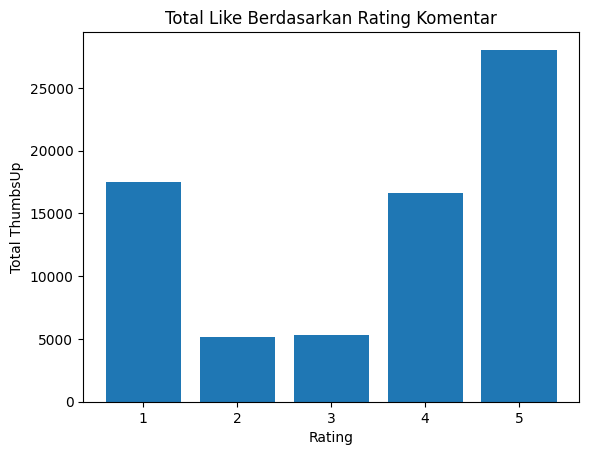

In [17]:
score_group = clean_df.groupby('score')['thumbsUpCount'].sum()
plt.bar(score_group.index, score_group.values)
plt.xlabel('Rating')
plt.ylabel('Total ThumbsUp')
plt.title('Total Like Berdasarkan Rating Komentar')
plt.show()

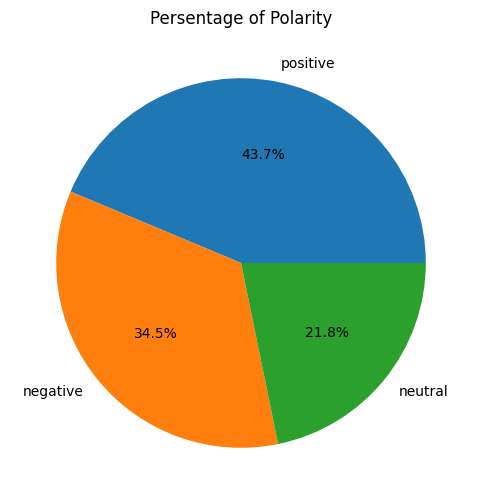

In [18]:
polarity_persentage = clean_df['polarity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(polarity_persentage, labels=polarity_persentage.index, autopct='%1.1f%%')
plt.title("Persentage of Polarity")
plt.show()

In [19]:
polarity_positive = clean_df[clean_df['polarity'] == 'positive']
polarity_negative = clean_df[clean_df['polarity'] == 'negative']
polarity_neutral = clean_df[clean_df['polarity'] == 'neutral']

all_teks_positive = ' '.join(polarity_positive['text_akhir'])
all_teks_negative = ' '.join(polarity_negative['text_akhir'])
all_teks_neutral = ' '.join(polarity_neutral['text_akhir'])

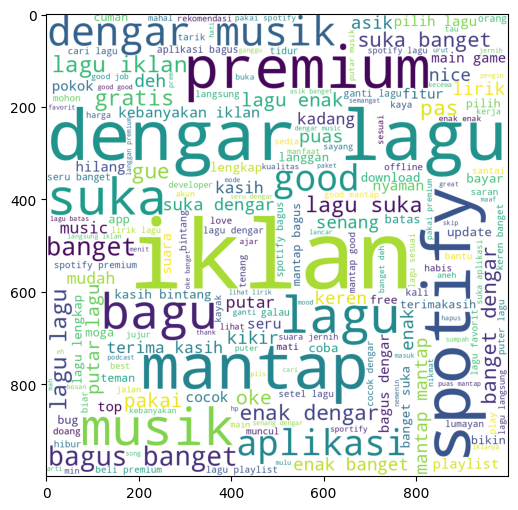

In [20]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_positive)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

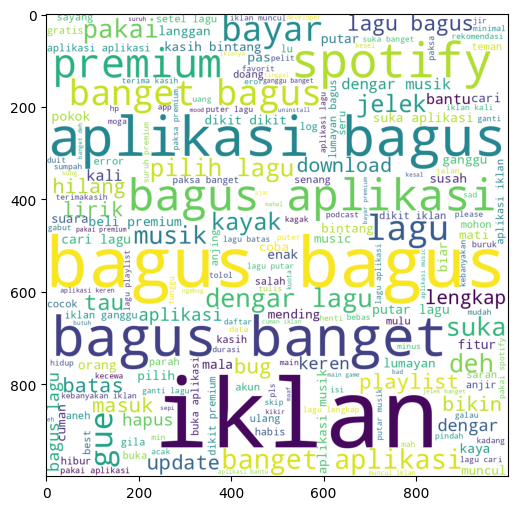

In [21]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_negative)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

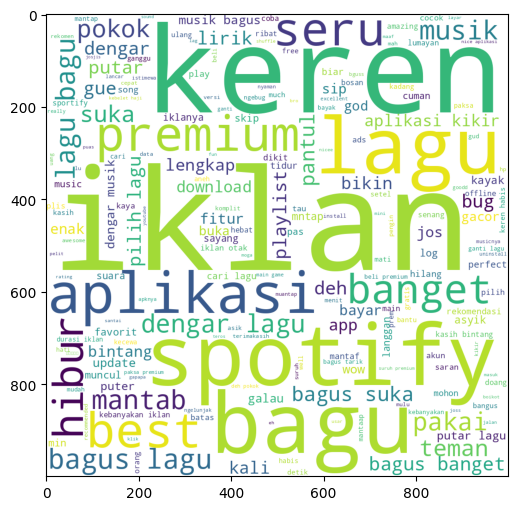

In [22]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_neutral)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

## Undersampling

In [23]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(clean_df[["text_akhir"]], clean_df["polarity"])
print(Counter(y_resampled))

Counter({'negative': 4858, 'neutral': 4858, 'positive': 4858})


In [24]:
X_resampled = X_resampled["text_akhir"]

## Data Spliting

In [25]:
le = LabelEncoder()
y = le.fit_transform(y_resampled)
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(4858), np.int64(1): np.int64(4858), np.int64(2): np.int64(4858)}


In [26]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y, test_size=0.3, random_state=42, stratify=y)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp)

In [28]:
print("Train size:", len(X_train))
print("Eval size :", len(X_eval))
print("Test size :", len(X_test))

Train size: 10201
Eval size : 1749
Test size : 2624


## IndoBert with PyTorch

In [29]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

def tokenize_text(text_series, max_len=128):
    encoded = tokenizer(
        text_series.tolist(),
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='pt'
    )
    return encoded

X_train_enc = tokenize_text(X_train)
X_test_enc  = tokenize_text(X_test)
X_eval_enc  = tokenize_text(X_eval)

In [30]:
def create_dataset(encoded, labels):
    dataset = TensorDataset(
        encoded["input_ids"],
        encoded["attention_mask"],
        torch.tensor(labels, dtype=torch.long)
    )
    return dataset
    
train_dataset = create_dataset(X_train_enc, y_train)
test_dataset  = create_dataset(X_test_enc, y_test)
eval_dataset  = create_dataset(X_eval_enc, y_eval)

In [31]:
def create_dataloader(dataset, batch_size=8, shuffle=True):
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    

train_loader = create_dataloader(train_dataset, batch_size=8, shuffle=True)
test_loader  = create_dataloader(test_dataset, batch_size=8, shuffle=False)
eval_loader  = create_dataloader(eval_dataset, batch_size=8, shuffle=False)

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [33]:
model = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobert-base-uncased",
    num_labels=3,
    hidden_dropout_prob = 0.1
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
scaler = torch.amp.GradScaler('cuda')

for epoch in range(5):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.amp.autocast('cuda'):
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)

    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in eval_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    precision = precision_score(all_labels, all_preds, average="weighted")
    recall = recall_score(all_labels, all_preds, average="weighted")

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Eval Acc: {acc:.4f} | F1: {f1:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | Train Loss: 0.5489 | Eval Acc: 0.8513 | F1: 0.8508 | Precision: 0.8562 | Recall: 0.8513
Epoch 2 | Train Loss: 0.3293 | Eval Acc: 0.8782 | F1: 0.8778 | Precision: 0.8824 | Recall: 0.8782
Epoch 3 | Train Loss: 0.2473 | Eval Acc: 0.8736 | F1: 0.8731 | Precision: 0.8845 | Recall: 0.8736
Epoch 4 | Train Loss: 0.1891 | Eval Acc: 0.8931 | F1: 0.8927 | Precision: 0.8952 | Recall: 0.8931
Epoch 5 | Train Loss: 0.1443 | Eval Acc: 0.9188 | F1: 0.9186 | Precision: 0.9194 | Recall: 0.9188


In [34]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

print("Accuracy:", correct / total)


Accuracy: 0.9047256097560976


In [35]:
model.save_pretrained('saved_mode/indobert-sentiment')
tokenizer.save_pretrained('saved_mode/indobert-sentiment')

('saved_mode/indobert-sentiment/tokenizer_config.json',
 'saved_mode/indobert-sentiment/special_tokens_map.json',
 'saved_mode/indobert-sentiment/vocab.txt',
 'saved_mode/indobert-sentiment/added_tokens.json',
 'saved_mode/indobert-sentiment/tokenizer.json')

## IndoBert with Tensor Flow

In [36]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

def encode(texts, labels):
    tokens = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors='tf'
    )
    return tokens, tf.convert_to_tensor(labels.tolist())

X_train_tok, y_train_tf = encode(X_train, y_train)
X_eval_tok, y_eval_tf = encode(X_eval, y_eval)
X_test_tok, y_test_tf = encode(X_test, y_test)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
I0000 00:00:1764043165.104168     881 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7099 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:05:00.0, compute capability: 8.9


In [37]:
num_labels = len(set(y))

model = TFAutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy("accuracy")]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [39]:
history = model.fit(
    dict(input_ids=X_train_tok["input_ids"], attention_mask=X_train_tok["attention_mask"]),
    y_train_tf,
    validation_data=(
        dict(input_ids=X_eval_tok["input_ids"], attention_mask=X_eval_tok["attention_mask"]),
        y_eval_tf
    ),
    epochs=5,         
    batch_size=16
)

Epoch 1/5


2025-11-25 10:59:46.264095: I external/local_xla/xla/service/service.cc:163] XLA service 0x75c519d31560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-25 10:59:46.264120: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-11-25 10:59:46.286277: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-25 10:59:46.324970: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
I0000 00:00:1764043186.409058   12665 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


638/638 [==============================] - 115s 133ms/step - loss: 0.3884 - accuracy: 0.8476 - val_loss: 0.2760 - val_accuracy: 0.8977
Epoch 2/5
638/638 [==============================] - 76s 120ms/step - loss: 0.1982 - accuracy: 0.9297 - val_loss: 0.2450 - val_accuracy: 0.9108
Epoch 3/5
638/638 [==============================] - 76s 120ms/step - loss: 0.1309 - accuracy: 0.9518 - val_loss: 0.2483 - val_accuracy: 0.9171
Epoch 4/5
638/638 [==============================] - 74s 116ms/step - loss: 0.0904 - accuracy: 0.9675 - val_loss: 0.2738 - val_accuracy: 0.9091
Epoch 5/5
638/638 [==============================] - 73s 115ms/step - loss: 0.0719 - accuracy: 0.9741 - val_loss: 0.2512 - val_accuracy: 0.9234


In [40]:
results = model.evaluate(
    dict(input_ids=X_test_tok["input_ids"], attention_mask=X_test_tok["attention_mask"]),
    y_test_tf
)

print("\n🔹 Test Loss:", results[0])
print("🔹 Test Accuracy:", results[1])

82/82 [==============================] - 6s 56ms/step - loss: 0.2826 - accuracy: 0.9093

🔹 Test Loss: 0.2825915515422821
🔹 Test Accuracy: 0.9092987775802612


In [42]:
model.save_pretrained("./my_model")


In [43]:
tokenizer.save_pretrained("./my_model")

('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.txt',
 './my_model/added_tokens.json',
 './my_model/tokenizer.json')

In [45]:
import json

label2id = {label: int(i) for i, label in enumerate(le.classes_)}
id2label = {int(i): label for i, label in enumerate(le.classes_)}


with open("./my_model/labels.json", "w") as f:
    json.dump({
        "label2id": label2id,
        "id2label": id2label
    }, f)
